In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
####데이터 사이트
"""
Data_Source_URL:  "https://data.giss.nasa.gov/gistemp/
데이터에 대한 기본 설명 - 지구의 온도를 육지-표면 대기온도와 바다-표면 수온온도를 연관시켜서 만든 표, 
줄여서 표현하면 육지-해양 온도 지수
그리고 육지-해양 온도를 1951~1980년을 평균으로 해서 육지-해양 온도를 표시한 것
즉 어떤 연도의 온도가 0 이면 1951~1980년의 육지-해양 온도 평균이랑 동일한 온도
"""

In [2]:
df_global = pd.read_csv('Global-Month-Annual-season.csv')
df_global
#전세계 데이터

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.17,-0.23,-0.08,-0.15,-0.09,-0.20,-0.17,-0.09,-0.14,-0.23,-0.21,-0.17,-0.16,***,***,-0.11,-0.15,-0.19
1,1881,-0.19,-0.13,0.04,0.06,0.07,-0.18,0.01,-0.02,-0.14,-0.21,-0.17,-0.06,-0.08,-0.08,-0.16,0.06,-0.06,-0.17
2,1882,0.17,0.15,0.05,-0.16,-0.14,-0.22,-0.15,-0.06,-0.13,-0.23,-0.15,-0.35,-0.1,-0.08,0.09,-0.08,-0.14,-0.17
3,1883,-0.28,-0.36,-0.11,-0.17,-0.16,-0.07,-0.05,-0.13,-0.2,-0.1,-0.22,-0.1,-0.16,-0.18,-0.33,-0.15,-0.08,-0.18
4,1884,-0.12,-0.06,-0.35,-0.40,-0.33,-0.35,-0.31,-0.26,-0.26,-0.24,-0.33,-0.3,-0.28,-0.26,-0.1,-0.36,-0.31,-0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2017,1.02,1.14,1.17,0.94,0.91,0.72,0.81,0.87,0.77,0.9,0.88,0.94,0.92,0.91,1.01,1.01,0.8,0.85
138,2018,0.81,0.84,0.88,0.89,0.82,0.77,0.82,0.76,0.8,1.01,0.83,0.92,0.85,0.85,0.86,0.86,0.78,0.88
139,2019,0.93,0.95,1.17,1.01,0.85,0.91,0.94,0.94,0.92,1.01,1,1.09,0.98,0.96,0.93,1.01,0.93,0.98
140,2020,1.17,1.24,1.17,1.13,1.02,0.92,0.9,0.87,0.99,0.88,1.1,0.81,1.02,1.04,1.17,1.11,0.89,0.99


In [3]:
df_north = pd.read_csv('North-Month-Annual-season.csv')
df_north
#북반구 데이터

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.35,-0.50,-0.23,-0.29,-0.05,-0.15,-0.17,-0.25,-0.22,-0.31,-0.42,-0.39,-0.28,***,***,-0.19,-0.19,-0.32
1,1881,-0.30,-0.21,-0.03,0.01,0.05,-0.32,0.09,-0.03,-0.25,-0.42,-0.36,-0.22,-0.17,-0.18,-0.3,0.01,-0.09,-0.35
2,1882,0.28,0.22,0.03,-0.31,-0.24,-0.29,-0.26,-0.13,-0.23,-0.51,-0.32,-0.66,-0.2,-0.17,0.09,-0.17,-0.23,-0.35
3,1883,-0.56,-0.65,-0.14,-0.28,-0.23,-0.11,-0.02,-0.2,-0.3,-0.15,-0.41,-0.14,-0.27,-0.31,-0.63,-0.22,-0.11,-0.29
4,1884,-0.16,-0.08,-0.62,-0.59,-0.36,-0.42,-0.42,-0.48,-0.43,-0.44,-0.57,-0.47,-0.42,-0.39,-0.13,-0.52,-0.44,-0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2017,1.39,1.52,1.52,1.20,0.92,0.93,0.97,1.02,1,1.05,1.23,1.4,1.18,1.15,1.32,1.22,0.97,1.09
138,2018,1.14,1.24,1.16,0.97,1.01,0.87,0.9,0.87,0.97,1.24,0.98,1.11,1.04,1.06,1.26,1.05,0.88,1.06
139,2019,1.21,1.13,1.55,1.25,0.99,1.20,1.04,1.09,1.21,1.31,1.21,1.4,1.22,1.19,1.15,1.26,1.11,1.24
140,2020,1.59,1.70,1.67,1.42,1.28,1.13,1.11,1.13,1.2,1.22,1.62,1.23,1.36,1.37,1.56,1.46,1.12,1.35


In [4]:
df_south = pd.read_csv('South-Month-Annual-season.csv')
df_south
# 남반구 데이터

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,0.01,0.04,0.06,-0.01,-0.12,-0.24,-0.16,0.07,-0.05,-0.14,0.01,0.06,-0.04,***,***,-0.02,-0.11,-0.06
1,1881,-0.08,-0.05,0.10,0.10,0.09,-0.05,-0.07,-0.02,-0.04,0,0.01,0.1,0.01,0.01,-0.02,0.10,-0.04,-0.01
2,1882,0.07,0.08,0.08,-0.01,-0.03,-0.15,-0.04,0.01,-0.04,0.04,0,-0.06,0,0.01,0.08,0.01,-0.06,0
3,1883,-0.02,-0.08,-0.08,-0.07,-0.09,-0.02,-0.08,-0.05,-0.1,-0.06,-0.04,-0.06,-0.06,-0.06,-0.05,-0.08,-0.05,-0.06
4,1884,-0.08,-0.05,-0.10,-0.21,-0.31,-0.29,-0.21,-0.06,-0.11,-0.06,-0.1,-0.15,-0.14,-0.14,-0.06,-0.21,-0.19,-0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2017,0.65,0.75,0.80,0.69,0.89,0.52,0.66,0.72,0.54,0.74,0.52,0.46,0.66,0.68,0.69,0.79,0.63,0.6
138,2018,0.47,0.44,0.60,0.79,0.63,0.68,0.74,0.65,0.64,0.79,0.68,0.72,0.65,0.63,0.46,0.68,0.69,0.7
139,2019,0.65,0.77,0.79,0.77,0.71,0.62,0.85,0.78,0.63,0.71,0.8,0.79,0.74,0.73,0.72,0.75,0.75,0.71
140,2020,0.74,0.77,0.67,0.85,0.76,0.71,0.69,0.61,0.77,0.55,0.59,0.39,0.68,0.71,0.77,0.76,0.67,0.64


In [5]:
df_global

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.17,-0.23,-0.08,-0.15,-0.09,-0.20,-0.17,-0.09,-0.14,-0.23,-0.21,-0.17,-0.16,***,***,-0.11,-0.15,-0.19
1,1881,-0.19,-0.13,0.04,0.06,0.07,-0.18,0.01,-0.02,-0.14,-0.21,-0.17,-0.06,-0.08,-0.08,-0.16,0.06,-0.06,-0.17
2,1882,0.17,0.15,0.05,-0.16,-0.14,-0.22,-0.15,-0.06,-0.13,-0.23,-0.15,-0.35,-0.1,-0.08,0.09,-0.08,-0.14,-0.17
3,1883,-0.28,-0.36,-0.11,-0.17,-0.16,-0.07,-0.05,-0.13,-0.2,-0.1,-0.22,-0.1,-0.16,-0.18,-0.33,-0.15,-0.08,-0.18
4,1884,-0.12,-0.06,-0.35,-0.40,-0.33,-0.35,-0.31,-0.26,-0.26,-0.24,-0.33,-0.3,-0.28,-0.26,-0.1,-0.36,-0.31,-0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2017,1.02,1.14,1.17,0.94,0.91,0.72,0.81,0.87,0.77,0.9,0.88,0.94,0.92,0.91,1.01,1.01,0.8,0.85
138,2018,0.81,0.84,0.88,0.89,0.82,0.77,0.82,0.76,0.8,1.01,0.83,0.92,0.85,0.85,0.86,0.86,0.78,0.88
139,2019,0.93,0.95,1.17,1.01,0.85,0.91,0.94,0.94,0.92,1.01,1,1.09,0.98,0.96,0.93,1.01,0.93,0.98
140,2020,1.17,1.24,1.17,1.13,1.02,0.92,0.9,0.87,0.99,0.88,1.1,0.81,1.02,1.04,1.17,1.11,0.89,0.99


In [6]:
df_global.describe()
#df_global 데이터 프레임에 대한 설명

,Year,Jan,Feb,Mar,Apr,May,Jun,MAM
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,1950.500000,0.052676,0.059577,0.074155,0.051690,0.042042,0.026479,0.055704
std,41.135953,0.411937,0.416924,0.417579,0.385575,0.366220,0.360367,0.385082
min,1880.000000,-0.800000,-0.630000,-0.630000,-0.590000,-0.550000,-0.510000,-0.580000
25%,1915.250000,-0.240000,-0.240000,-0.220000,-0.250000,-0.247500,-0.240000,-0.250000
50%,1950.500000,-0.015000,-0.040000,0.010000,-0.035000,-0.045000,-0.060000,-0.030000
75%,1985.750000,0.300000,0.370000,0.300000,0.277500,0.270000,0.230000,0.295000
max,2021.000000,1.170000,1.370000,1.360000,1.130000,1.020000,0.920000,1.140000


In [7]:
df_global.index
#df_global 인덱스 확인

RangeIndex(start=0, stop=142, step=1)

In [8]:
df_global.columns
#df_global 컬럼 확인

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON'],
      dtype='object')

In [9]:
df_global.info()
#df_global 전체 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    142 non-null    int64  
 1   Jan     142 non-null    float64
 2   Feb     142 non-null    float64
 3   Mar     142 non-null    float64
 4   Apr     142 non-null    float64
 5   May     142 non-null    float64
 6   Jun     142 non-null    float64
 7   Jul     142 non-null    object 
 8   Aug     142 non-null    object 
 9   Sep     142 non-null    object 
 10  Oct     142 non-null    object 
 11  Nov     142 non-null    object 
 12  Dec     142 non-null    object 
 13  J-D     142 non-null    object 
 14  D-N     142 non-null    object 
 15  DJF     142 non-null    object 
 16  MAM     142 non-null    float64
 17  JJA     142 non-null    object 
 18  SON     142 non-null    object 
dtypes: float64(7), int64(1), object(11)
memory usage: 21.2+ KB


In [10]:
df_global.isnull().sum()
#df_global null값 확인

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
J-D     0
D-N     0
DJF     0
MAM     0
JJA     0
SON     0
dtype: int64

In [11]:
df_global_resize = df_global.loc[ ( df_global['Year'] > 1944 ) & ( df_global['Year'] < 2021) , :]
df_global_resize
#전세계 데이터중 필요한 연도 - 1945~2020까지 

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
65,1945,0.10,0.00,0.06,0.19,0.05,0.00,0.03,0.26,0.2,0.18,0.07,-0.07,0.09,0.1,0.04,0.10,0.1,0.15
66,1946,0.15,0.02,0.01,0.05,-0.07,-0.21,-0.12,-0.2,-0.08,-0.08,-0.05,-0.31,-0.07,-0.05,0.04,0.00,-0.18,-0.07
67,1947,-0.07,-0.08,0.06,0.06,-0.02,-0.02,-0.04,-0.07,-0.13,0.07,0.03,-0.13,-0.03,-0.04,-0.15,0.03,-0.04,-0.01
68,1948,0.06,-0.15,-0.25,-0.12,-0.01,-0.05,-0.11,-0.12,-0.15,-0.05,-0.12,-0.24,-0.11,-0.1,-0.07,-0.12,-0.09,-0.11
69,1949,0.07,-0.14,-0.02,-0.11,-0.10,-0.27,-0.13,-0.13,-0.15,-0.07,-0.1,-0.18,-0.11,-0.12,-0.1,-0.08,-0.18,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2016,1.17,1.37,1.36,1.11,0.95,0.80,0.85,1.01,0.9,0.88,0.91,0.86,1.01,1.04,1.23,1.14,0.89,0.9
137,2017,1.02,1.14,1.17,0.94,0.91,0.72,0.81,0.87,0.77,0.9,0.88,0.94,0.92,0.91,1.01,1.01,0.8,0.85
138,2018,0.81,0.84,0.88,0.89,0.82,0.77,0.82,0.76,0.8,1.01,0.83,0.92,0.85,0.85,0.86,0.86,0.78,0.88
139,2019,0.93,0.95,1.17,1.01,0.85,0.91,0.94,0.94,0.92,1.01,1,1.09,0.98,0.96,0.93,1.01,0.93,0.98


In [12]:
df_north_resize = df_north.loc[ ( df_north['Year'] > 1944 ) & ( df_north['Year'] < 2021) , :]
df_north_resize
#북반구 데이터중 필요한 연도 - 1945~2020까지 

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
65,1945,0.11,-0.06,0.09,0.29,0.08,0.08,0.06,0.28,0.2,0.24,0.09,-0.21,0.1,0.12,0.01,0.15,0.14,0.18
66,1946,0.34,0.09,0.12,0.32,0.03,-0.05,-0.04,-0.1,-0.04,0.02,0.07,-0.45,0.03,0.05,0.08,0.16,-0.06,0.02
67,1947,-0.04,-0.04,0.29,0.22,0.06,0.00,-0.03,-0.04,-0.01,0.41,0.19,-0.05,0.08,0.05,-0.18,0.19,-0.02,0.2
68,1948,0.31,-0.14,-0.27,-0.03,0.17,0.04,0.01,0.03,-0.03,0.08,0.04,-0.39,-0.02,0.01,0.04,-0.04,0.03,0.03
69,1949,0.23,-0.09,0.04,-0.02,0.01,-0.20,-0.11,-0.05,-0.1,0.07,0.05,-0.14,-0.03,-0.05,-0.08,0.01,-0.12,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2016,1.55,1.94,1.91,1.49,1.12,1.12,1.04,1.12,1.22,1.03,1.12,1.04,1.31,1.35,1.67,1.50,1.09,1.12
137,2017,1.39,1.52,1.52,1.20,0.92,0.93,0.97,1.02,1,1.05,1.23,1.4,1.18,1.15,1.32,1.22,0.97,1.09
138,2018,1.14,1.24,1.16,0.97,1.01,0.87,0.9,0.87,0.97,1.24,0.98,1.11,1.04,1.06,1.26,1.05,0.88,1.06
139,2019,1.21,1.13,1.55,1.25,0.99,1.20,1.04,1.09,1.21,1.31,1.21,1.4,1.22,1.19,1.15,1.26,1.11,1.24


In [13]:
df_south_resize = df_south.loc[ ( df_south['Year'] > 1944 ) & ( df_south['Year'] < 2021) , :]
df_south_resize
#남반구 데이터중 필요한 연도 - 1945-2020까지

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
65,1945,0.09,0.07,0.03,0.09,0.04,-0.06,0.02,0.24,0.21,0.13,0.07,0.08,0.09,0.09,0.09,0.05,0.07,0.14
66,1946,-0.03,-0.03,-0.09,-0.21,-0.17,-0.37,-0.21,-0.31,-0.13,-0.18,-0.18,-0.15,-0.17,-0.15,0.01,-0.15,-0.3,-0.16
67,1947,-0.08,-0.12,-0.17,-0.11,-0.09,-0.04,-0.05,-0.1,-0.24,-0.27,-0.15,-0.22,-0.14,-0.13,-0.12,-0.12,-0.06,-0.22
68,1948,-0.18,-0.15,-0.22,-0.21,-0.18,-0.16,-0.23,-0.26,-0.27,-0.19,-0.28,-0.09,-0.2,-0.21,-0.18,-0.20,-0.22,-0.25
69,1949,-0.10,-0.20,-0.09,-0.20,-0.21,-0.35,-0.16,-0.21,-0.19,-0.21,-0.25,-0.23,-0.2,-0.19,-0.13,-0.16,-0.24,-0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2016,0.79,0.79,0.81,0.73,0.79,0.49,0.66,0.91,0.59,0.74,0.7,0.68,0.72,0.73,0.79,0.78,0.69,0.68
137,2017,0.65,0.75,0.80,0.69,0.89,0.52,0.66,0.72,0.54,0.74,0.52,0.46,0.66,0.68,0.69,0.79,0.63,0.6
138,2018,0.47,0.44,0.60,0.79,0.63,0.68,0.74,0.65,0.64,0.79,0.68,0.72,0.65,0.63,0.46,0.68,0.69,0.7
139,2019,0.65,0.77,0.79,0.77,0.71,0.62,0.85,0.78,0.63,0.71,0.8,0.79,0.74,0.73,0.72,0.75,0.75,0.71


In [14]:
df_global_resize['J-D'].sort_values().dtypes
"""
위에서 설명한 듯이 육지-해양 온도 지수를 J-D로 평균을 잡은것으로 데이터 시각화를 함
참고로 J-D는 그 해의 Jan부터 Dec까지의 육지-해양 온도 지수를 평균으로 계산한것
"""

'\n위에서 설명한 듯이 육지-해양 온도 지수를 J-D로 평균을 잡은것으로 데이터 시각화를 함\n참고로 J-D는 그 해의 Jan부터 Dec까지의 육지-해양 온도 지수를 평균으로 계산한것\n'

In [15]:
df_global_resize_float = pd.to_numeric(df_global_resize['J-D'])
#['J-D'] 연평균 온도의 자료형을 float형으로 바꿈

In [16]:
df_global_resize_float.dtypes

dtype('float64')

In [17]:
df_north_resize['J-D'].sort_values().dtypes

dtype('O')

In [18]:
df_north_resize_float = pd.to_numeric(df_north_resize['J-D'])
#['J-D'] 연평균 온도의 자료형을 float형으로 바꿈

In [19]:
df_north_resize_float.dtypes

dtype('float64')

In [20]:
df_south_resize['J-D'].sort_values().dtypes

dtype('O')

In [21]:
df_south_resize_float = pd.to_numeric(df_south_resize['J-D'])
#['J-D'] 연평균 온도의 자료형을 float형으로 바꿈

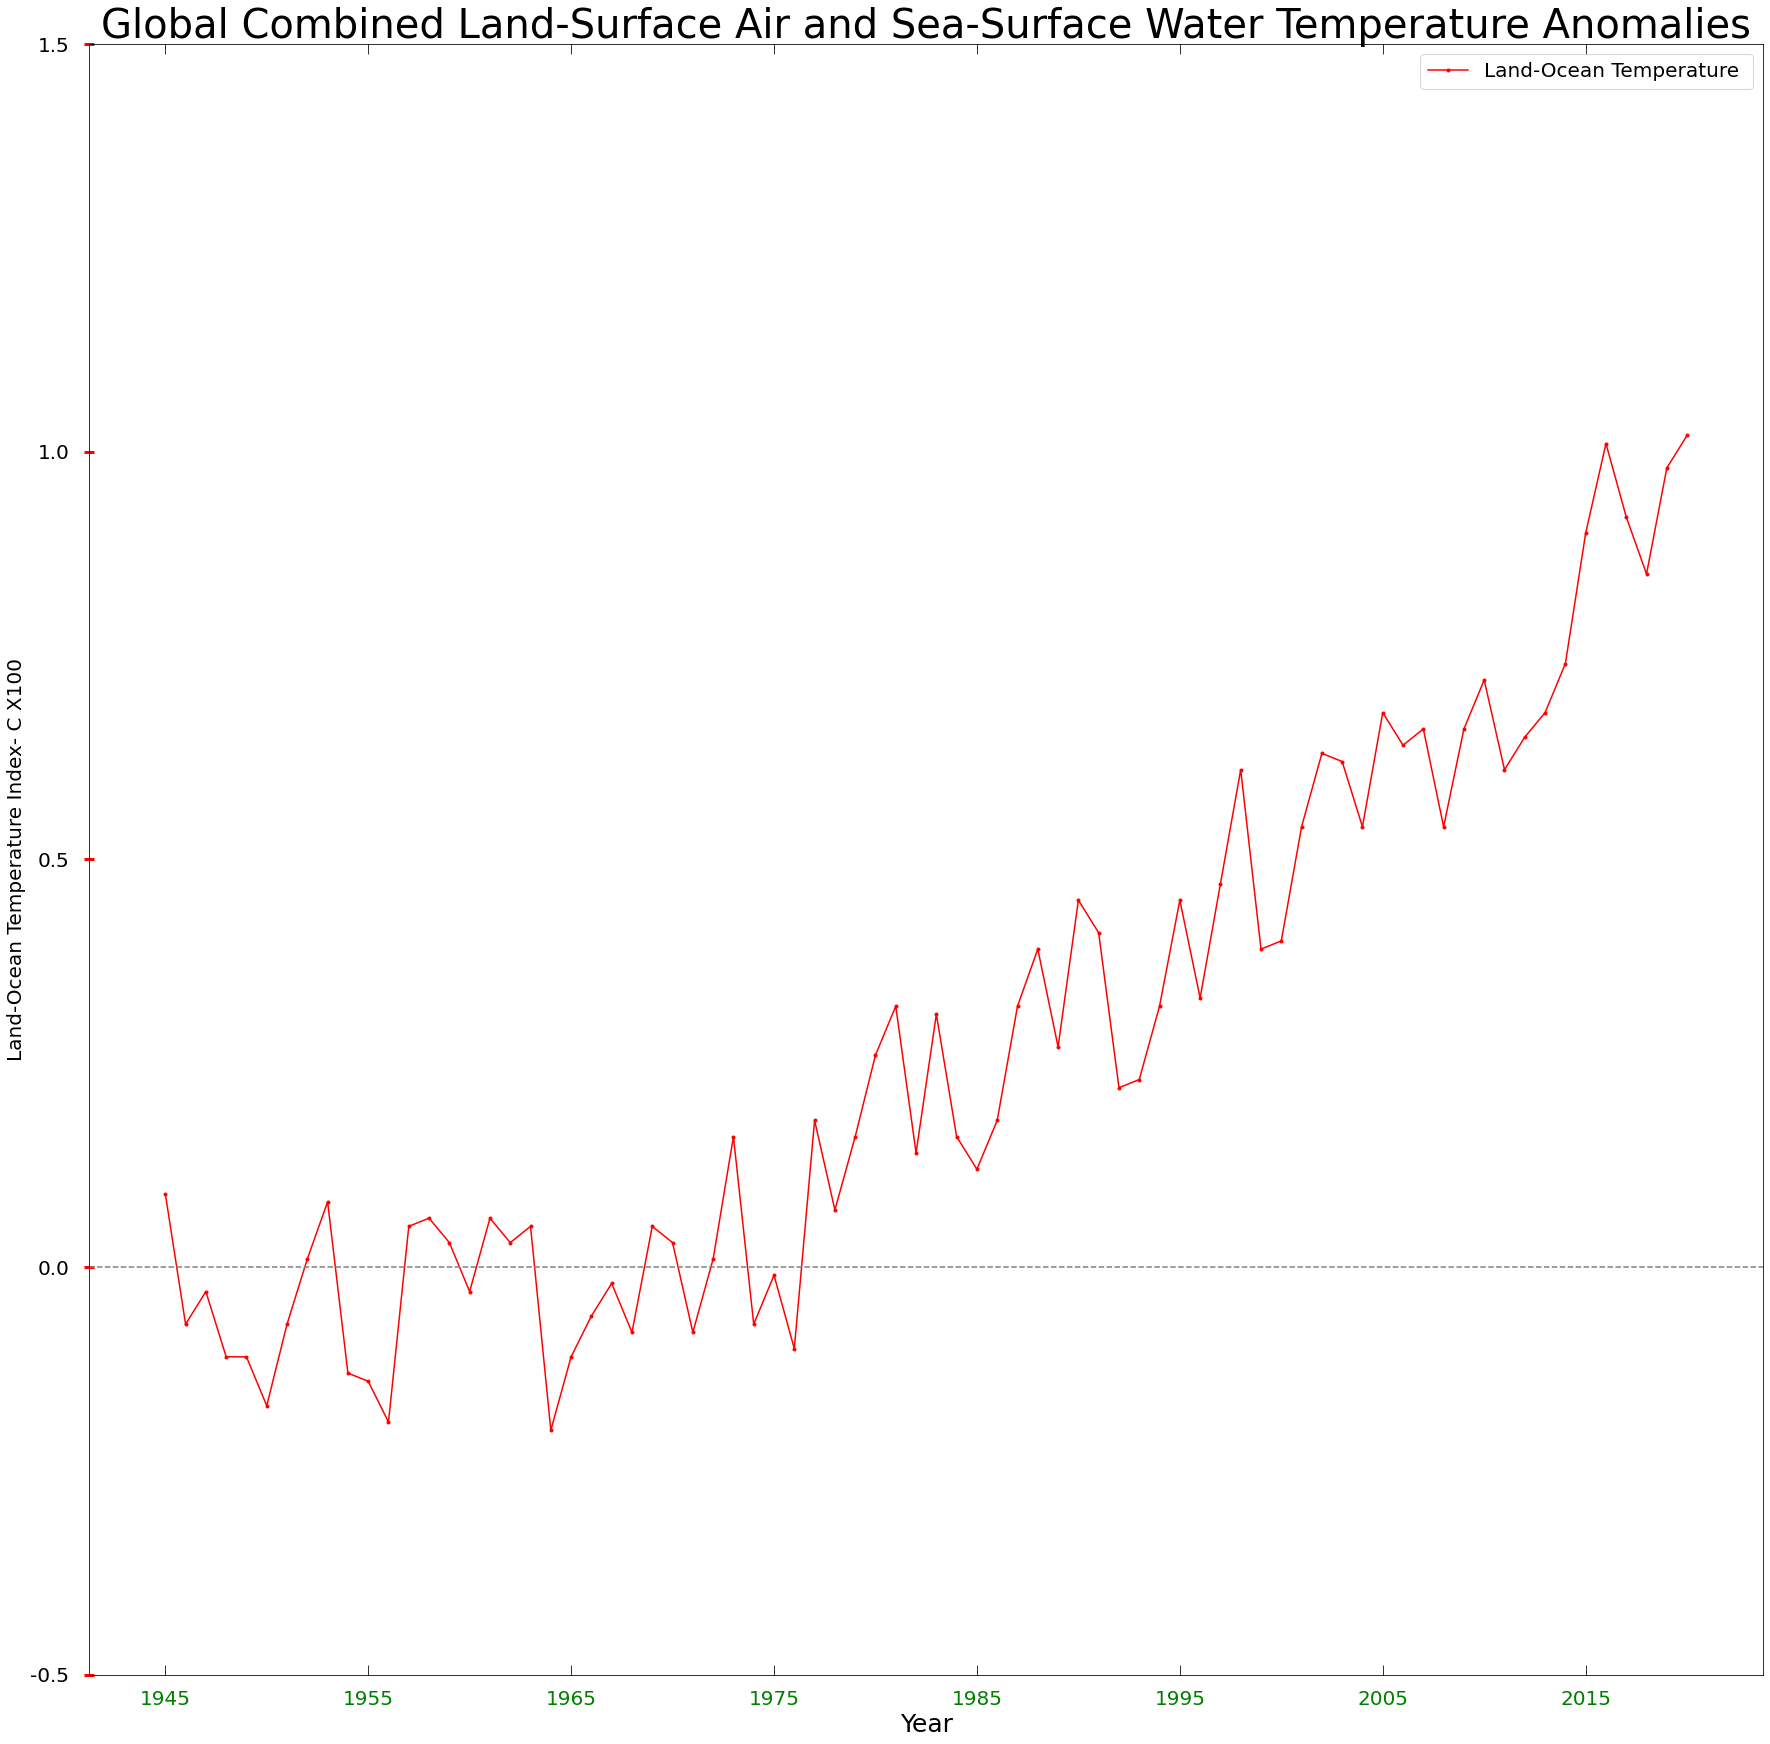

In [40]:
plt.plot((df_global_resize['Year']), (df_global_resize_float), 'r.-', label = 'Land-Ocean Temperature ')
# 앞에가 X축 , 뒤에가 Y축

plt.rcParams["figure.figsize"] = (30, 30)  #차트 크기 
plt.xlabel('Year', fontsize = 25)   #x축 라벨
plt.ylabel('Land-Ocean Temperature Index- C ', fontsize = 20)  #y축 라벨
plt.axhline('0', color='gray', linestyle='--')
# 1950~1980년을 기준으로 평균 온도 측정함 - 0도 보다 높으면 기준 연도보다 높은 기온이라는 뜻 '0'
plt.legend(fontsize=20) #라벨 표시
plt.xticks(np.arange(1945, 2020 , 10),(np.arange(1945,2020,10)))   #X축 눈금 표시
plt.yticks(np.arange(-0.5, 2 , 0.5),(np.arange(-0.5, 2,0.5)))   #Y축 눈금 표시

plt.tick_params(axis='y', direction='inout', length=10, pad=15, labelsize=20, width=3, color='r')   # Y눈금 스타일
plt.tick_params(axis='x', direction='in', length=10, pad=15, labelsize=20, labelcolor='green', top=True)  # X눈금 스타일

plt.title("Global Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies",fontsize=40)  # 차트 타이틀
plt.show()

"""
그래프 의미 - 1951~1980년의 육지-해양 온도 지수 평균인 0도 보다 높아지고 있는 모습
"""

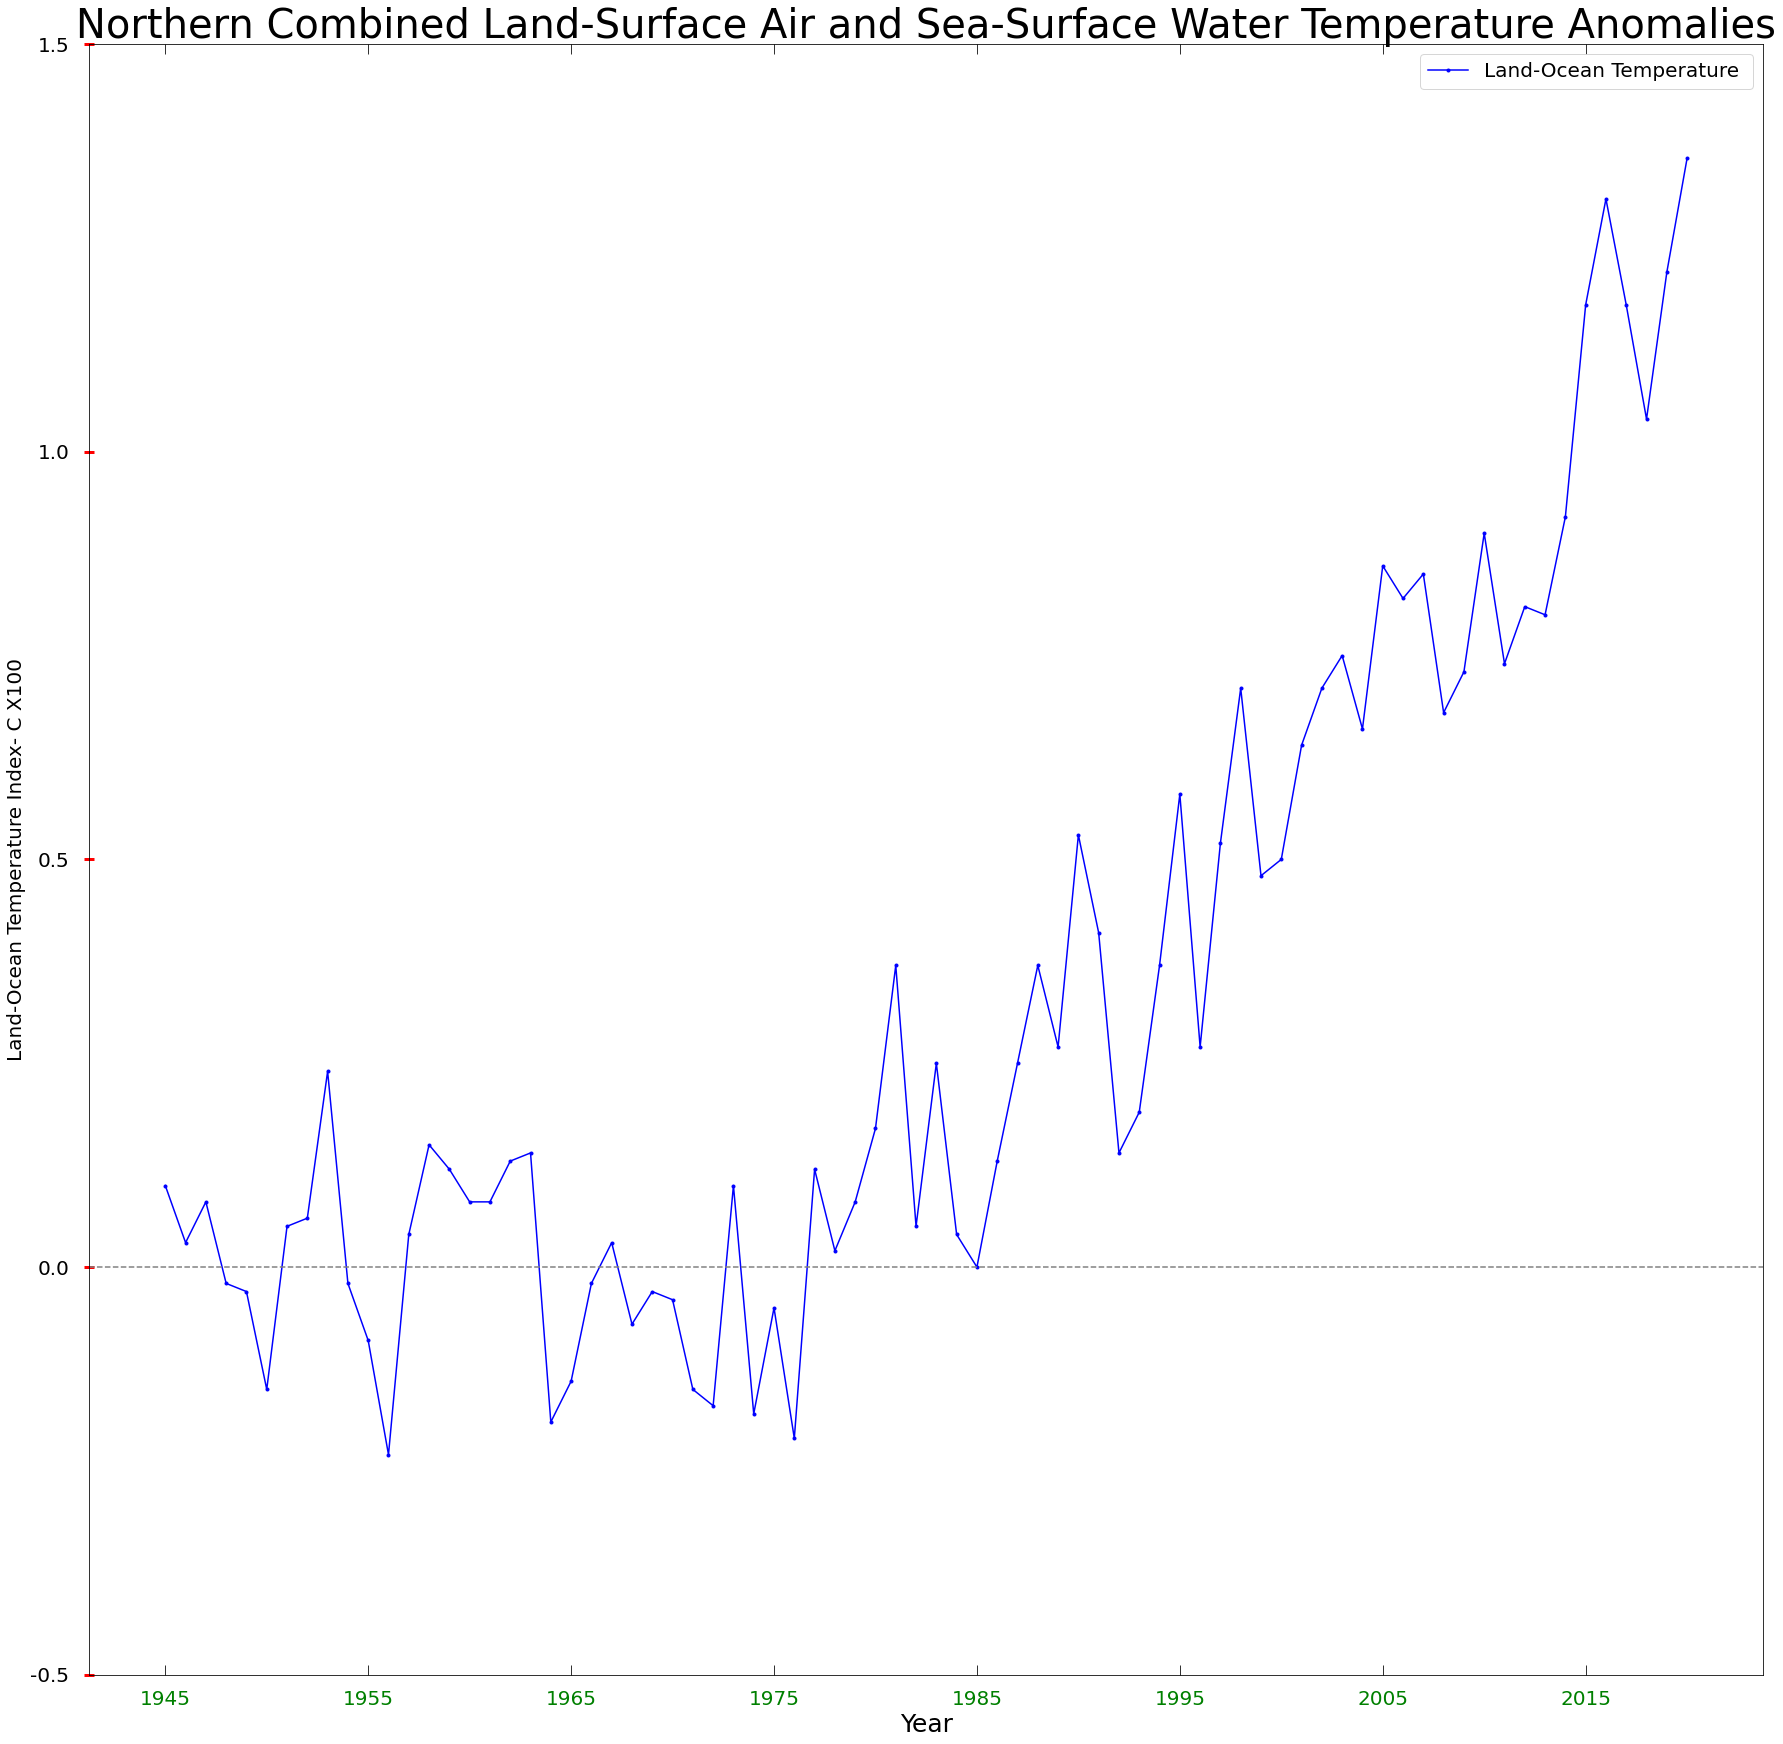

In [41]:
plt.plot((df_north_resize['Year']), (df_north_resize_float), 'b.-', label = 'Land-Ocean Temperature ')
# 앞에가 X축 , 뒤에가 Y축

plt.rcParams["figure.figsize"] = (30, 30)  #차트 크기 
plt.xlabel('Year', fontsize = 25)   #x축 라벨
plt.ylabel('Land-Ocean Temperature Index- C ', fontsize = 20)  #y축 라벨
plt.axhline('0', color='gray', linestyle='--')
# 1950~1980년을 기준으로 평균 온도 측정함 - 0도 보다 높으면 기준 연도보다 높은 기온이라는 뜻 '0'
plt.legend(fontsize=20) #라벨 표시
plt.xticks(np.arange(1945, 2020 , 10),(np.arange(1945,2020,10)))   #X축 눈금 표시
plt.yticks(np.arange(-0.5, 2 , 0.5),(np.arange(-0.5, 2,0.5)))   #Y축 눈금 표시

plt.tick_params(axis='y', direction='inout', length=10, pad=15, labelsize=20, width=3, color='r')   # Y눈금 스타일
plt.tick_params(axis='x', direction='in', length=10, pad=15, labelsize=20, labelcolor='green', top=True)  # X눈금 스타일

plt.title("Northern Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies",fontsize=40)  # 차트 타이틀
plt.show()
"""
그래프 의미 - 1951~1980년의 육지-해양 온도 지수 평균인 0도 보다 높아지고 있는 모습
"""

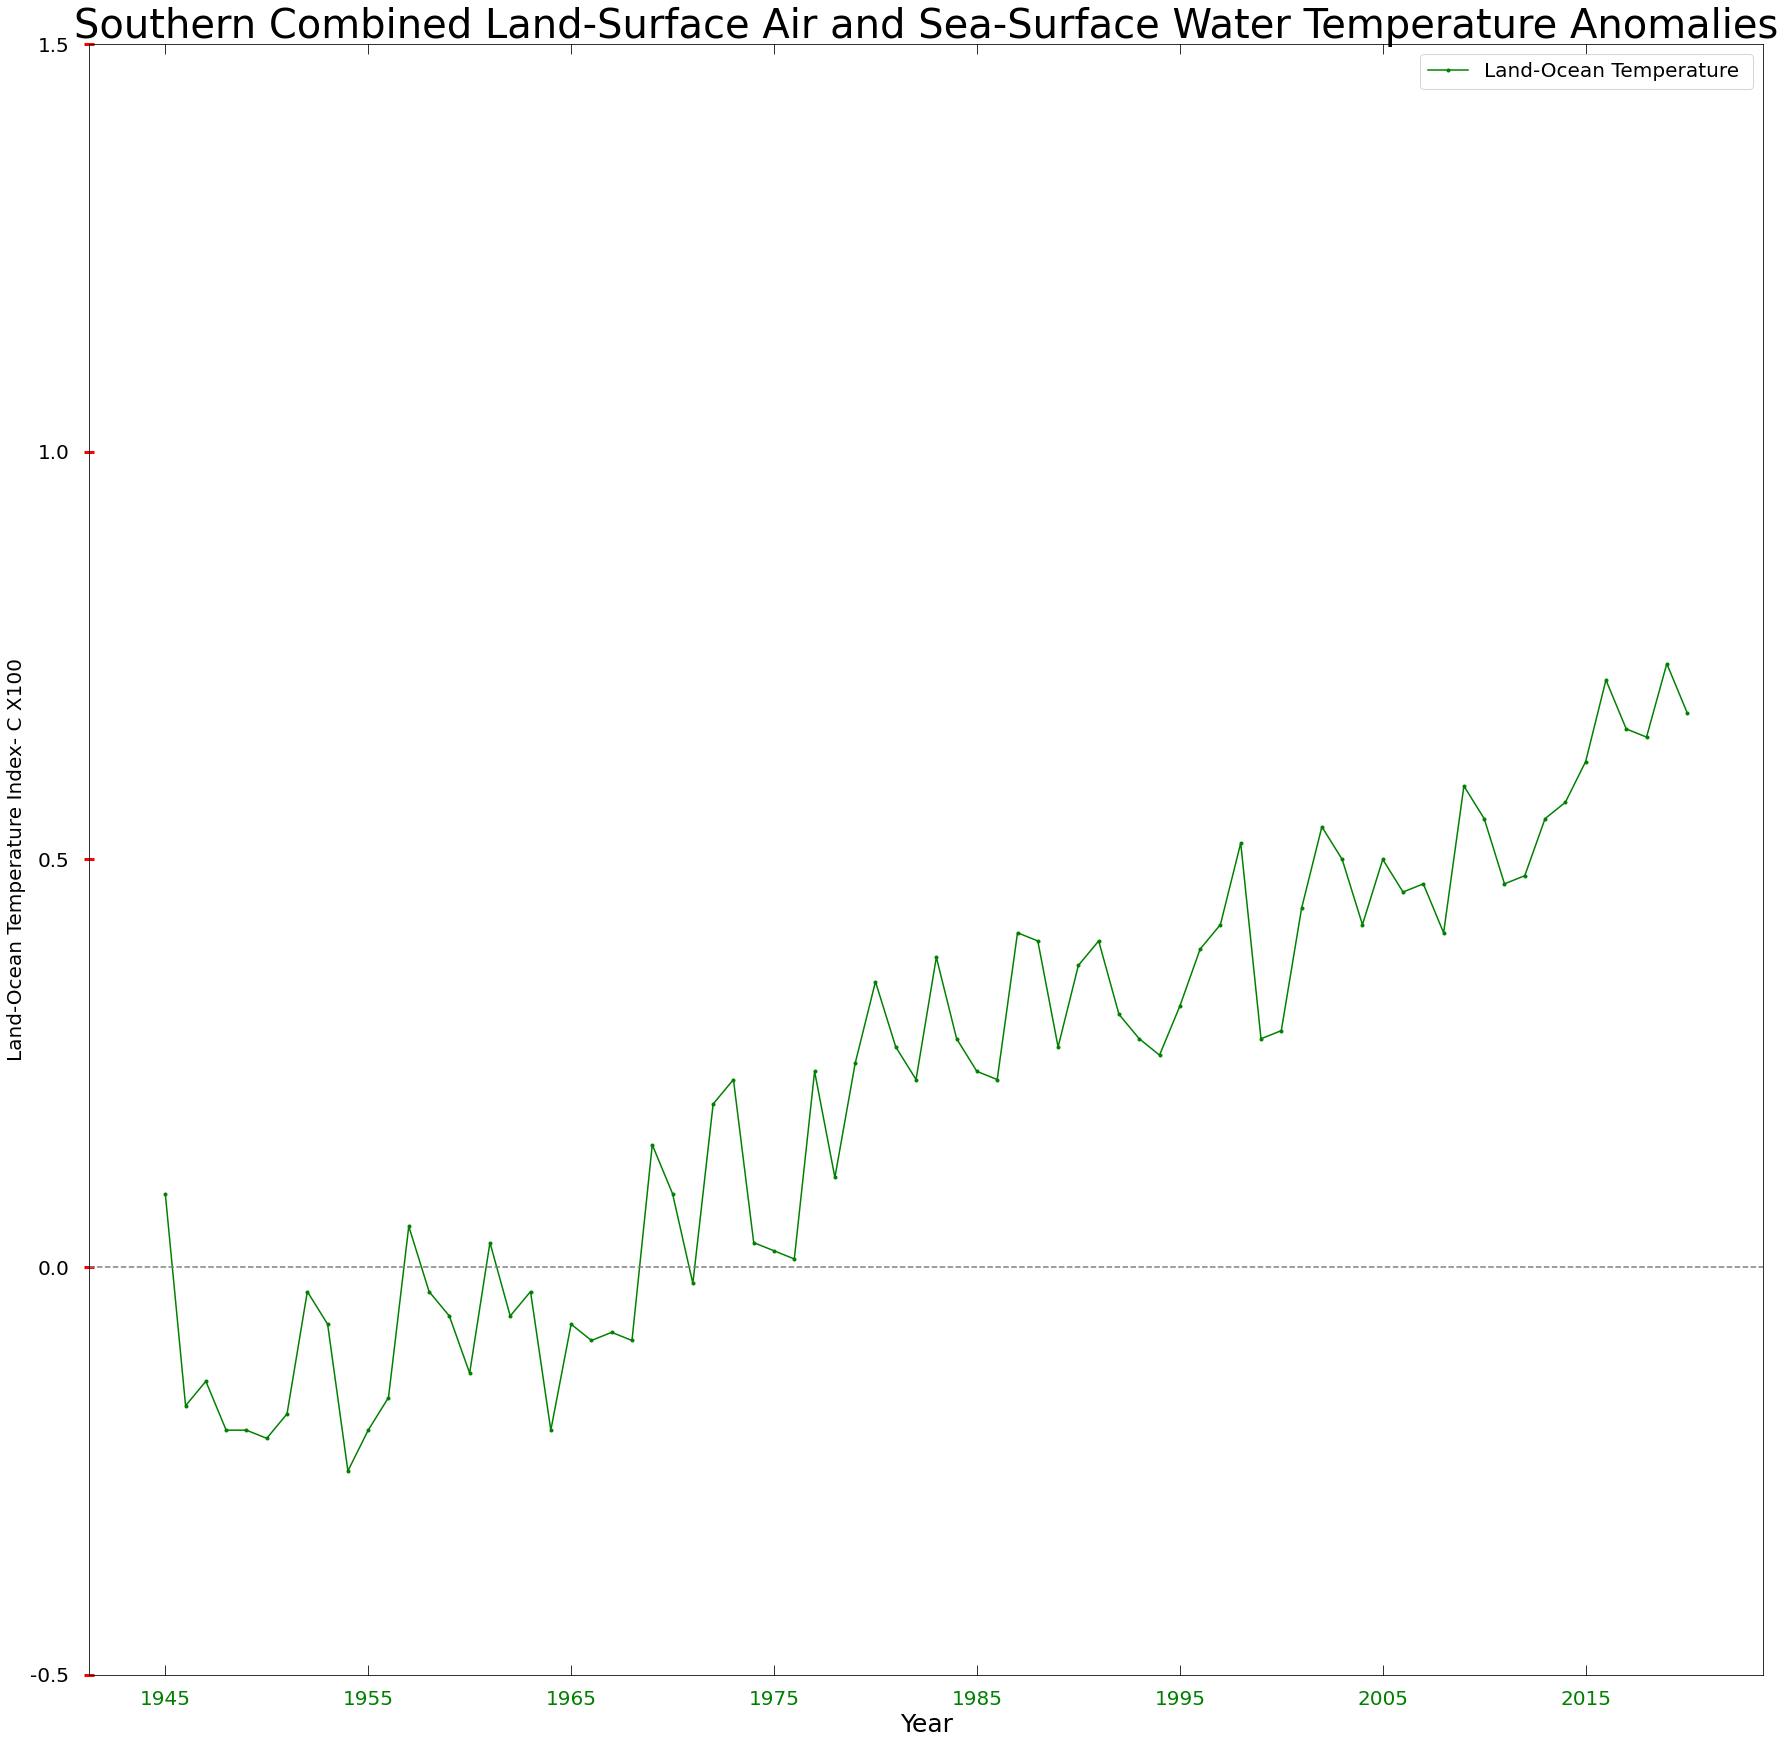

In [42]:
plt.plot((df_south_resize['Year']), (df_south_resize_float), 'g.-', label = 'Land-Ocean Temperature ')
# 앞에가 X축 , 뒤에가 Y축

plt.rcParams["figure.figsize"] = (30, 30)  #차트 크기 
plt.xlabel('Year', fontsize = 25)   #x축 라벨
plt.ylabel('Land-Ocean Temperature Index- C ', fontsize = 20)  #y축 라벨
plt.axhline('0', color='gray', linestyle='--')
# 1950~1980년을 기준으로 평균 온도 측정함 - 0도 보다 높으면 기준 연도보다 높은 기온이라는 뜻 '0'
plt.legend(fontsize=20) #라벨 표시
plt.xticks(np.arange(1945, 2020 , 10),(np.arange(1945,2020,10)))   #X축 눈금 표시
plt.yticks(np.arange(-0.5, 2 , 0.5),(np.arange(-0.5, 2,0.5)))   #Y축 눈금 표시

plt.tick_params(axis='y', direction='inout', length=10, pad=15, labelsize=20, width=3, color='r')   # Y눈금 스타일
plt.tick_params(axis='x', direction='in', length=10, pad=15, labelsize=20, labelcolor='green', top=True)  # X눈금 스타일

plt.title("Southern Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies",fontsize=40)  # 차트 타이틀
plt.show()
"""
그래프 의미 - 1951~1980년의 육지-해양 온도 지수 평균인 0도 보다 높아지고 있는 모습
"""

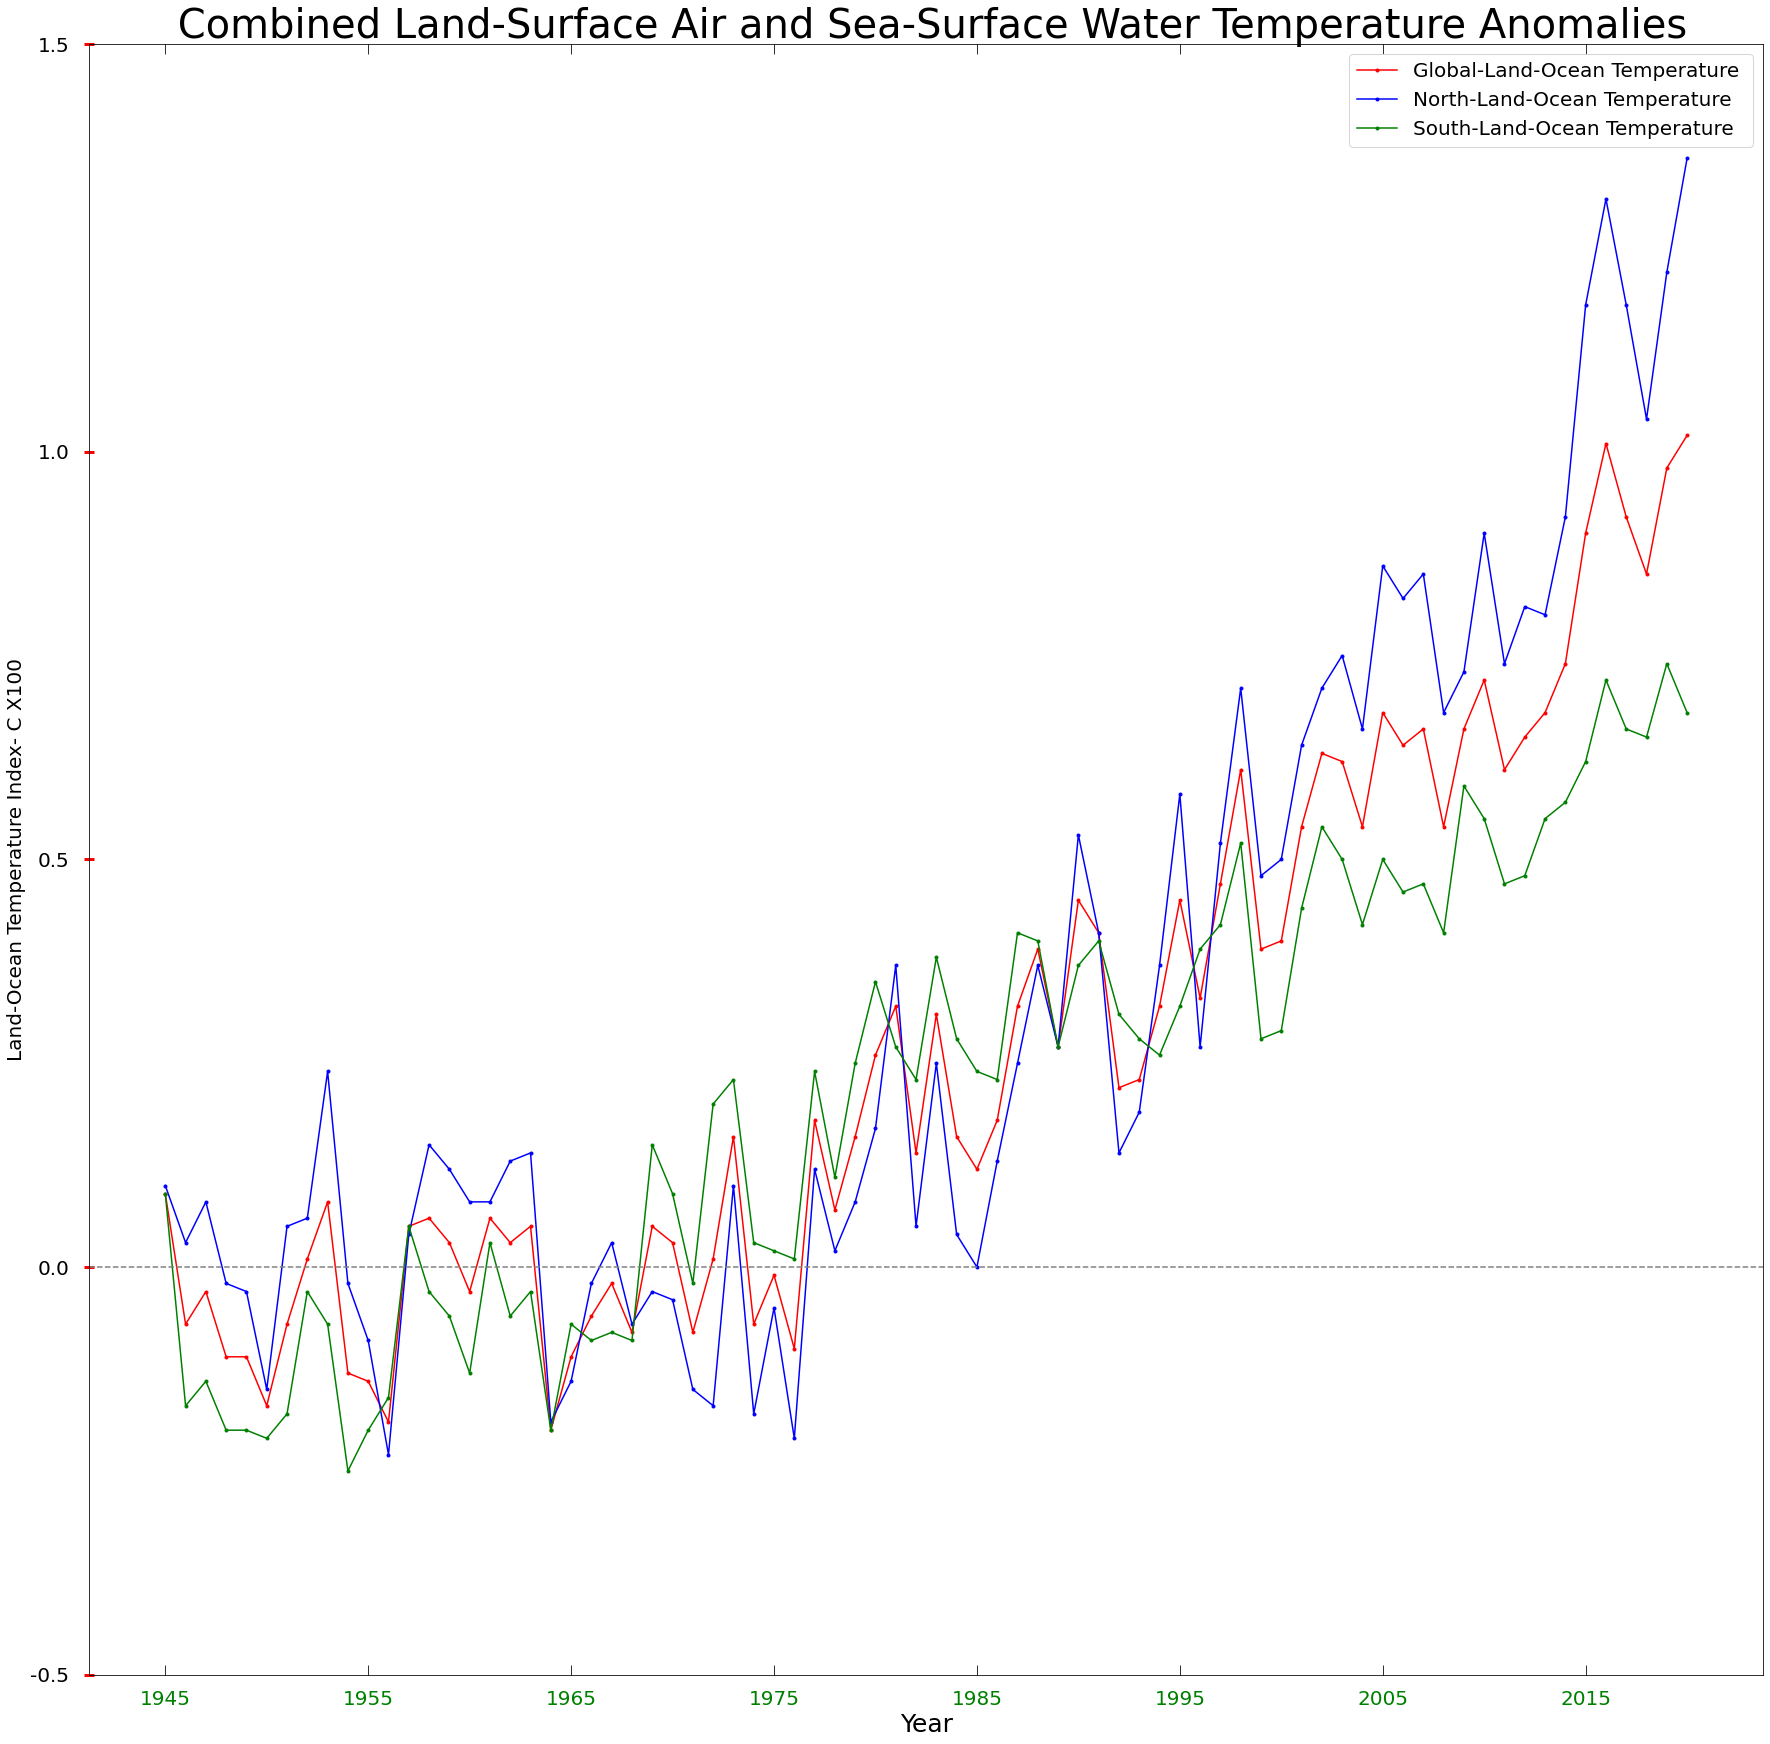

In [44]:
plt.plot((df_global_resize['Year']), (df_global_resize_float) , 'r.-', label = 'Global-Land-Ocean Temperature ')
plt.plot((df_north_resize['Year']), (df_north_resize_float), 'b.-', label = 'North-Land-Ocean Temperature ')
plt.plot((df_south_resize['Year']), (df_south_resize_float), 'g.-', label = 'South-Land-Ocean Temperature ')

plt.rcParams["figure.figsize"] = (30, 30)  #차트 크기 
plt.xlabel('Year', fontsize = 25)   #x축 라벨
plt.ylabel('Land-Ocean Temperature Index- C ', fontsize = 20)  #y축 라벨
plt.axhline('0', color='gray', linestyle='--')
# 1950~1980년을 기준으로 평균 온도 측정함 - 0도 보다 높으면 기준 연도보다 높은 기온이라는 뜻 '0'
plt.legend(fontsize=20) #라벨 표시
plt.xticks(np.arange(1945, 2020 , 10),(np.arange(1945,2020,10)))   #X축 눈금 표시
plt.yticks(np.arange(-0.5, 2 , 0.5),(np.arange(-0.5, 2,0.5)))   #Y축 눈금 표시

plt.tick_params(axis='y', direction='inout', length=10, pad=15, labelsize=20, width=3, color='r')   # Y눈금 스타일
plt.tick_params(axis='x', direction='in', length=10, pad=15, labelsize=20, labelcolor='green', top=True)  # X눈금 스타일

plt.title(" Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies",fontsize=40)  # 차트 타이틀
plt.show()